In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import re

In [2]:
def calculate_cdf(data_ratios):
  cdf = []
  cumulative_count = 0
  print("size of data_ratios", len(data_ratios))

  for ratio in sorted(data_ratios):  # 데이터 비율을 정렬하여 누적 노드 수 계산
    cumulative_count += ratio
    cdf.append(cumulative_count)

  return cdf

size of data_ratios 1185925


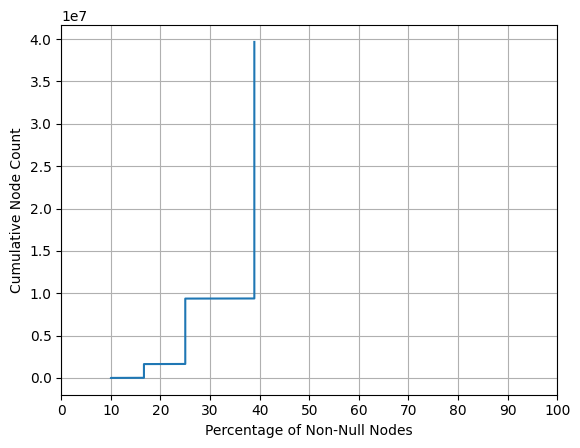

size of data_ratios 1170023


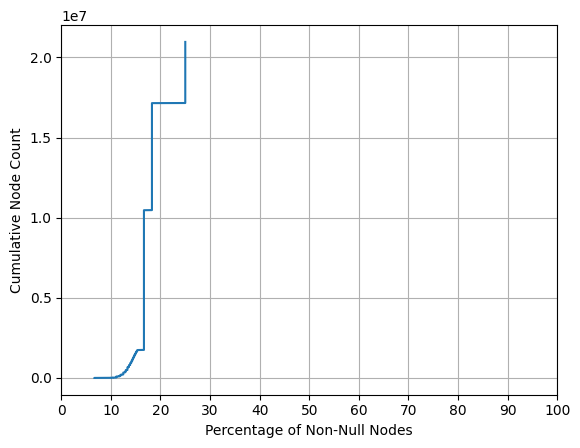

size of data_ratios 1228144


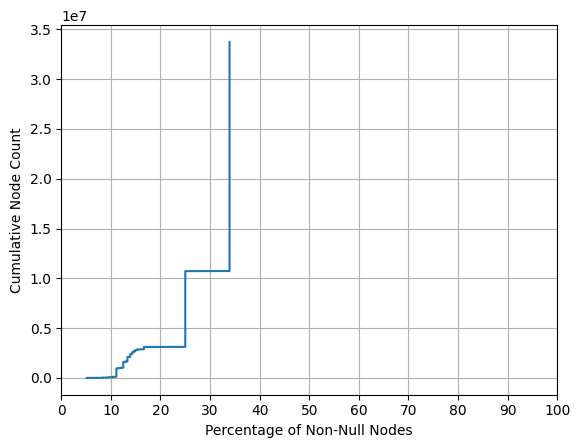

size of data_ratios 1203443


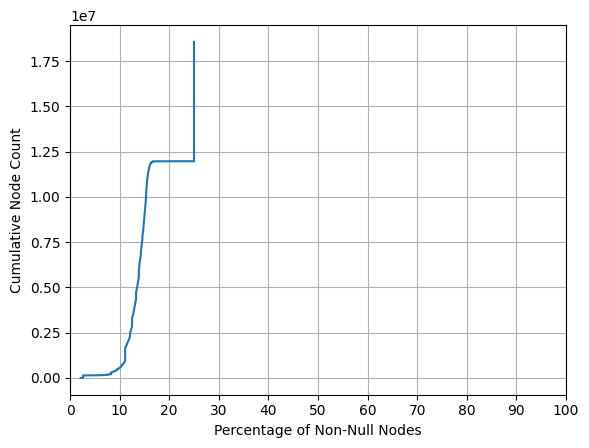

In [3]:
build_path = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))), 'build')
csv_file_names = glob.glob(os.path.join(build_path, 'distribution_*.csv'))

for csv_file in csv_file_names:
  data_ratios = []

  with open(csv_file, 'r') as f:
    lines = f.readlines()
    for line in lines:
      m = re.match(r'(\d+),(\d+),(\d+),(\d+),(\d+)', line)
      if m:
        (total, null, data, node, height) = (int(m.group(1)), int(m.group(2)), int(m.group(3)), int(m.group(4)), int(m.group(5)))
        data_ratio = (total - null) / total * 100 if total > 0 else 0  # 전체 노드 중 null이 아닌 노드의 비율 계산
        data_ratios.extend([data_ratio] * (total - null))

  cdf = calculate_cdf(data_ratios)

  plt.plot(sorted(data_ratios), cdf)
  plt.xlabel('Percentage of Non-Null Nodes')
  plt.ylabel('Cumulative Node Count')
  plt.xticks(range(0, 101, 10))
  plt.grid(True)
  plt.show()